In [7]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import sawtooth

π = np.pi

# **La transformation de Fourier**

## **I] <u>Rappels sur les signaux périodiques</u>**
### **1) <u>Qu'est-ce qu'un signal périodique ?</u>**
#### En physique, un signal est une fonction qui transmet des informations sur un phénomène (onde électromagnétique, onde sonore, mouvement d’une corde vibrante, signal électrique…). <br><br> Un signal f(x) est dit **P-périodique** lorsqu’il vérifie : **f(x + P) = f(x)**
<center> <img src="Ressources/Periodic_function_illustration.svg.png" width=1200 height=480 /> </center>

---------------------------------------------------------

### **2) <u>Les paramètres d'un signal périodique</u>**
#### Soit $g(t)$ la fonction temporelle d'un signal T-périodique. <br> On peut définir : <br> &emsp; - sa **période $T$** en secondes $(s)$ <br> &emsp; - sa **fréquence $f = 1/T$** en Hertz $(Hz=s^{-1})$ <br> &emsp; - son **amplitude A** (l'unité dépend du type de signal) <br> &emsp; - sa **position de phase $ϕ = 2π×ΔT/T$** en radian (ou en degrés) <br><br> Visualisons ces paramètres sur $g(t)=A×cos(2πft+ϕ)$ avec $f=0.5Hz$, $A=1$ et $ϕ=-\frac{π}{4}$ :
<center> <img src="Ressources/cos.PNG" width=1250 height=625 /> </center>

---------------------------------------------------------

## **II] <u>Les séries de Fourier</u>**
### **1) <u>Introduction</u>**
#### L'observation de Fourier : tout signal périodique raisonnablement continu peut être développé en la somme d'une série de signaux sinusoïdaux (appelée série de Fourier) ayant des coefficients d'amplitude et de phase spécifiques (appelés coefficients de Fourier)
### **2) <u>Exemple : le signal en dents de scie</u>**
#### Prennons l'exemple d'un signal en dents de scie. Sa série de Fourier est :
# $$ g(t) = \frac{2}{π}\sum_{k=1}^{+\infty}\frac{(-1)^{k+1}}{k}sin(2πkft) $$ $$ = \frac{2}{π}(sin(2πft)-\frac{1}{2}sin(4πft)+\frac{1}{3}sin(6πft)-\frac{1}{4}sin(8πft)+...) $$ <br>
<center> <img src="Ressources/Synthesis_sawtooth.gif"/> </center>

---------------------------------------------------------

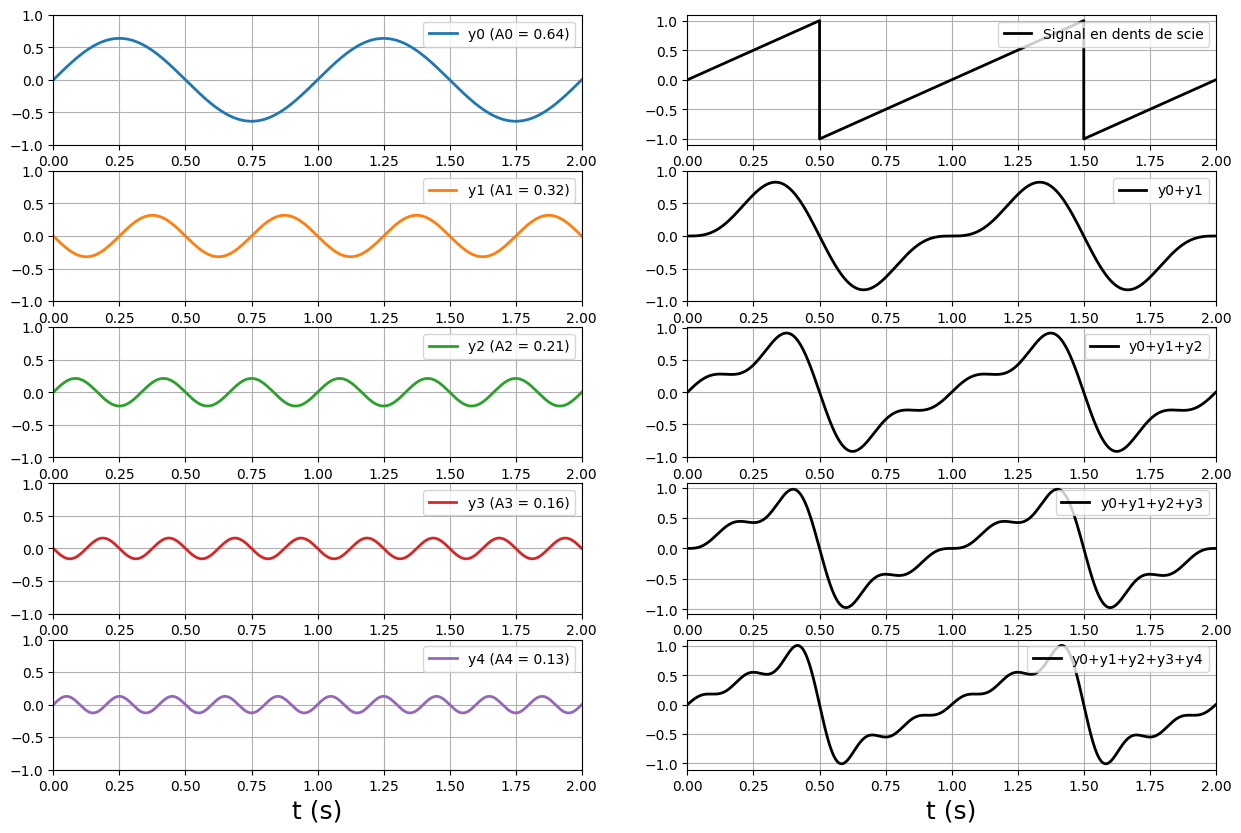

In [24]:
t = np.arange(-1, 3, 0.00001)
y = sawtooth(2*π*t-π)
y0 = 2/π*np.sin(2*π*t)
y1 = -1/π*np.sin(4*π*t)
y2 = 2/(3*π)*np.sin(6*π*t)
y3 = -1/(2*π)*np.sin(8*π*t)
y4 = 2/(5*π)*np.sin(10*π*t)
Y = [y0, y1, y2, y3, y4]

plt.figure(figsize=(15, 10), dpi=100)
plt.subplot(5, 2, 1)
plt.plot(t, y0, label=f'y0 (A0 = {round(max(y0), 2)})', linewidth=2)
plt.xlim(0, 2)
plt.yticks(np.arange(-1, 1.5, 0.5))
plt.legend()
plt.grid()
plt.subplot(5, 2, 2)
plt.plot(t, y, 'k', label='Signal en dents de scie', linewidth=2)
plt.xlim(0, 2)
plt.yticks(np.arange(-1, 1.5, 0.5))
plt.legend(loc='upper right')
plt.grid()
for i in range(4):
    plt.subplot(5, 2, 2*i+3)
    plt.plot(t, Y[i+1], f'C{i+1}', label=f'y{i+1} (A{i+1} = {round(max(Y[i+1]), 2)})', linewidth=2)
    plt.xlim(0, 2)
    plt.yticks(np.arange(-1, 1.5, 0.5))
    if i == 3 : plt.xlabel('t (s)', fontsize=18)
    plt.legend()
    plt.grid()
    plt.subplot(5, 2, 2*i+4)
    lab = [f'y{y}' for y in range(i+2)]
    plt.plot(t, sum(Y[:i+2]), 'k', label='+'.join(lab), linewidth=2)
    plt.xlim(0, 2)
    plt.yticks(np.arange(-1, 1.5, 0.5))
    if i == 3 : plt.xlabel('t (s)', fontsize=18)
    plt.legend(loc='upper right')
    plt.grid()
plt.show()

-----------------------------

### **3) <u>Généralisation</u>**
#### Tout signal périodique peut être développé en une série de Fourier. Elle aura la forme : 
# $$f(x) = \sum_{n=-\infty}^{+\infty}c_n(f)e^{i2π\frac{n}{T}x}$$ 
#### avec $c_{n}(f)$ les coefficients de Fourier de $f$ définis par : 
# $$c_n(f) = \frac{1}{T}\int_{T}f(t)e^{-i2π\frac{n}{T}t}dt $$ <br> 
#### On utilise ici la forme exponentielle, qui peut être développée selon la formule d'Euler en : 
# $$ e^{ix} = cos(x)+isin(x) $$ 
#### avec $i$ l'unité imaginaire telle que $i^2 = -1$
#### On appelle **nombre complexe** tout nombre pouvant s'écrire sous la forme $a + bi$ avec $(a, b) ∈ ℝ^2$.

-----------------------------

### **4) <u>Le spectre fréquentiel en amplitude d'un signal périodique</u>**
#### Le **spectre** d'un signal périodique est la représentation graphique de l'amplitude des éléments de sa série de Fourier (donc ses coefficients de Fourier) en fonction de leur fréquence.

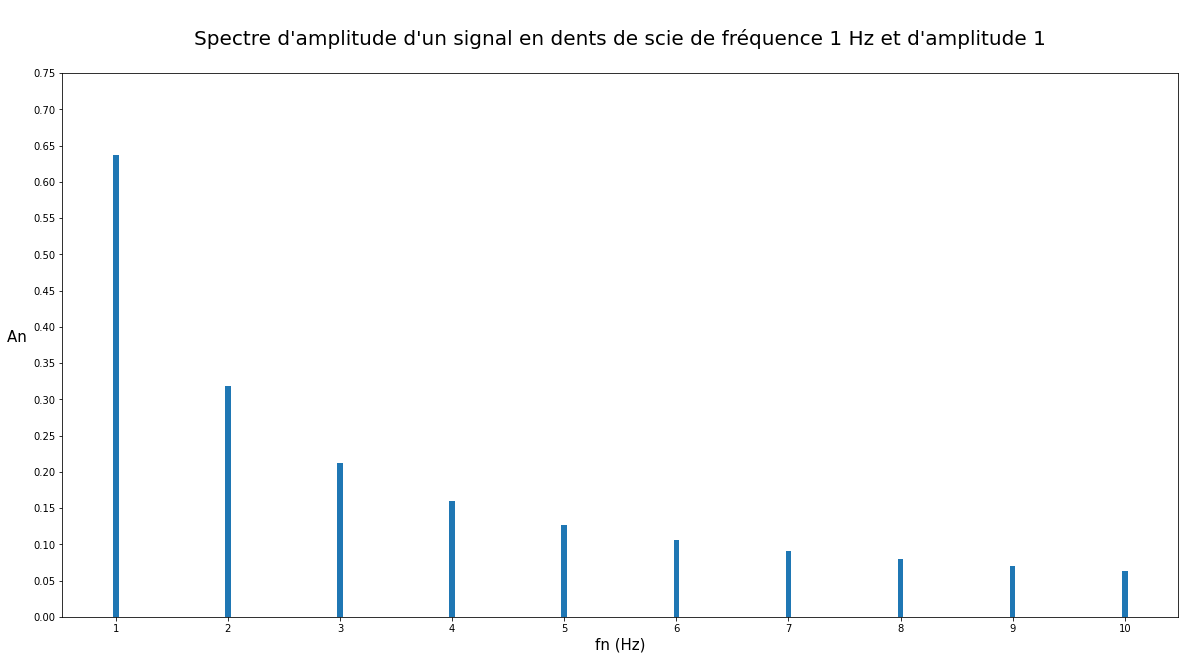

In [ ]:
frequence = np.arange(1, 11)
amplitude = [2/(k*π) for k in frequence]
plt.figure(figsize=(20, 10))
plt.bar(x=frequence, height=amplitude, width=0.05)
plt.xticks(np.arange(min(frequence), max(frequence)+1, 1))
plt.yticks(np.arange(0, 0.8, 0.05))
plt.xlabel('fn (Hz)', fontsize=15)
plt.ylabel('An     ', rotation=0, fontsize=15)
plt.title("\nSpectre d'amplitude d'un signal en dents de scie de fréquence 1 Hz et d'amplitude 1\n", fontsize=20)
plt.show()

-----------------------------

## **II] <u>Extension aux signaux non périodiques : la transformation de Fourier</u>**
### **1) <u>Introduction</u>**
#### On a vu que l'on pouvait développer en série de Fourier un signal périodique, mais qu'en est-il des signaux non périodiques ? Il suffit de considérer qu'un signal non périodique est périodique mais avec une période de durée infinie !
<center> <img src="Ressources/FS-FT.png"/> </center>

#### La transformation de Fourier est une extension, pour les fonctions non périodiques, du développement en série de Fourier des fonctions périodiques. Elle associe à une fonction intégrable définie sur $ℝ^n$ et à valeurs réelles ou complexes, une autre fonction sur $ℝ^n$ appelée transformée de Fourier dont la variable indépendante peut s'interpréter en physique comme la fréquence ou la pulsation. <br><br> La transformée de Fourier représente une fonction de la densité spectrale de la fonction dont elle provient, en tant que moyenne de fonctions trigonométriques de toutes fréquences. <br><br> On appelle spectre fréquentiel d'un signal la courbe de sa transformée de Fourier.

-----------------------------

### **2) <u>Les applications de la transformation de Fourier</u>**
#### Les principales applications pratiques de la transformation de Fourier sont :
#### • La résolution d'équations différentielles partielles ;
#### • La spectroscopie (mesure d'un spectre d'émission ou d'absorbtion) : <br> &emsp; - spectroscopie optique, <br> &emsp; - spectroscopie IR (infra-rouge), <br> &emsp; - spectroscopie RMN (résonance magnétique nucléaire), <br> &emsp; - spectrométrie de masse, <br> &emsp; - spectroscopie de résonance de spin électronique. <br>
#### • La physique quantique ;
#### • Le **traitement de signal**, notamment l'analyse spectrale de séries temporelles.

### **3) <u>La transformée de Fourier discrète (DFT)</u>**
#### La transformation de Fourier discrète permet de convertir une séquence finie d'échantillons équidistants d'une fonction en une séquence de même taille d'échantillons équidistants de sa transformée de Fourier discrète.
#### La transformée de Fourier discrète est une fonction à valeurs complexe de la fréquence.
#### L'intérêt d'une transformation de Fourier discrète est qu'elle traite une quantité finie de données, et peut donc être implémentée dans des algorithmes numériques.
#### En traitement numérique du signal, cette fonction représente la variation de toute quantité par rapport au temps, telle que l'amplitude d'une onde sonore (pression), d'un signal radio (champ électromagnétique), de températures... <br> Dans le traitement d'images, les échantillons peuvent être les valeurs des pixels selon une ligne ou une colonne.
#### Une application algorithmique naïve de la DFT a une complexité en $O(n^2)$.

-----------------------------

## **III] <u>La transformation de Fourier rapide (FFT), ou l'algorithme qui a changé le monde</u>**
### **1) <u>Son origine</u>**
#### La FFT est un algorithme de calcul de DFT imaginé par le mathématicien allemand Carl Friedrich Gauss en 1805 alors qu'il faisait des calculs mentaux nécessitants une transformation de Fourier et qui étaient trop lents avec une DFT classique. Cependant, ne réalisant pas la portée de sa découverte, il décida de ne pas la publier (pour sa défense il n'y avais pas d'ordinateur en 1805).
#### L'algorithme de FFT a une complexité en $O(n×log(n))$.
![](Ressources/Carl_Friedrich_Gauss.jpg)

-----------------------------

### **2) <u>Un peu d'histoire</u>**
#### L'algorithme à été ré-inventé en 1965 par les mathématiciens américains John Tukey et James William Cooley alors que, dans un contexte de guerre froide et de course à l'arme nucléaire, ils cherchaient une méthode de DFT plus efficace que la méthode naïve pour détecter des tests d'armes nucléaires sous-terrains dans des données sismographiques.
![Alt text](Ressources/8fa767578f1259018ad1351858299044--math-james-darcy.jpg)